# Diplodatos Kaggle Competition

#### Autor: Ferraro, María Eugenia

We present this peace of code to create the baseline for the competition, and as an example of how to deal with these kind of problems. The main goals are that you:

1. Learn
1. Try different models and see which one fits the best the given data
1. Get a higher score than the given one in the current baseline example
1. Try to get the highest score in the class :)

In [1]:
# Import the required packages
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the given labels
breed = pd.read_csv('../data/breed_labels.csv')
color = pd.read_csv('../data/color_labels.csv')
state = pd.read_csv('../data/state_labels.csv')

Now we take a look at the labels, just to understand what these are

In [3]:
breed.head()

,BreedID,Type,BreedName
0,1,1,Affenpinscher
1,2,1,Afghan Hound
2,3,1,Airedale Terrier
3,4,1,Akbash
4,5,1,Akita


In [4]:
color.head()

,ColorID,ColorName
0,1,Black
1,2,Brown
2,3,Golden
3,4,Yellow
4,5,Cream


In [5]:
state

,StateID,StateName
0,41336,Johor
1,41325,Kedah
2,41367,Kelantan
3,41401,Kuala Lumpur
4,41415,Labuan
5,41324,Melaka
6,41332,Negeri Sembilan
7,41335,Pahang
8,41330,Perak
9,41380,Perlis


And now we are ready to deal with the *original* dataset...

In [6]:
original_df = pd.read_csv('../data/train.csv')

In [7]:
original_df.columns

Index(['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'Description',
       'AdoptionSpeed', 'PID'],
      dtype='object')

In [8]:
original_df.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,AdoptionSpeed,PID
count,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000
mean,1.454734,10.520412,265.469854,74.388868,1.779059,2.230675,3.236912,1.856738,1.860518,1.460971,1.729730,1.566528,1.912115,1.036666,1.584011,20.809960,41345.994613,2.518900,7477.025799
std,0.497970,18.374027,60.121490,123.434010,0.684763,1.743985,2.748595,2.974465,0.547535,0.593843,0.670791,0.701482,0.564041,0.198228,1.488348,78.397243,32.409109,1.176018,4310.921553
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,2.000000,3768.250000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,2.000000,7473.500000
75%,2.000000,12.000000,307.000000,188.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,4.000000,11200.750000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,4.000000,14992.000000


In [9]:
original_df.head(2)

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,Description,AdoptionSpeed,PID
0,2,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,Nibble is a 3+ month old ball of cuteness. He ...,2,0
1,1,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,"Good guard dog, very alert, active, obedience ...",2,3


In [10]:
D_train = pd.read_csv("../data/train.csv")
D_test  = pd.read_csv("../data/test.csv")

In [12]:
def transform_columns(df):
    df = df.drop(["Description"], axis=1)
    df.Type = df.Type.replace({1: 'Dog', 2: 'Cat'})
    df.Gender = df.Gender.replace({1:'Male', 2:'Female', 3:'Mixed'})
    df.MaturitySize = df.MaturitySize.replace({1:'S', 2:'M', 3:'L', 4:'XL', 0:'N/A'})
    df.FurLength = df.FurLength.replace({1:'S', 2:'M', 3:'L', 0:'N/A'})
    df.Vaccinated = df.Vaccinated.replace({1:'T', 2:'N', 3:'N/A'})
    df.Dewormed = df.Dewormed.replace({1:'T', 2:'F', 3:'N/A'})
    df.Sterilized = df.Sterilized.replace({1:'T', 2:'F', 3:'N/A'})
    df.Health = df.Health.replace({1:'Healthy', 2: 'MinorInjury', 3:'SeriousInjury', 0: 'N/A'})
    df.Color1 = df.Color1.replace(dict(list(zip(color.ColorID, color.ColorName)) + [(0, "N/A")]))
    df.Color2 = df.Color2.replace(dict(list(zip(color.ColorID, color.ColorName)) + [(0, "N/A")]))
    df.Color3 = df.Color3.replace(dict(list(zip(color.ColorID, color.ColorName)) + [(0, "N/A")]))
    df.Breed1 = df.Breed1.replace(dict(list(zip(breed.BreedID, breed.BreedName)) + [(0, "N/A")]))
    df.Breed2 = df.Breed2.replace(dict(list(zip(breed.BreedID, breed.BreedName)) + [(0, "N/A")]))
    return df

In [13]:
train = transform_columns(D_train)

In [14]:
train.head()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,AdoptionSpeed,PID
0,Cat,3,Tabby,N/A,Male,Black,White,N/A,S,S,N,F,F,Healthy,1,100,41326,2,0
1,Dog,4,Mixed Breed,N/A,Female,Black,Brown,N/A,M,S,T,T,F,Healthy,1,150,41401,2,3
2,Dog,1,Mixed Breed,N/A,Male,Black,N/A,N/A,M,S,N,F,F,Healthy,1,0,41326,2,4
3,Cat,3,Domestic Short Hair,N/A,Female,Cream,Gray,N/A,M,S,N,F,F,Healthy,1,0,41326,2,5
4,Cat,12,Domestic Long Hair,Domestic Long Hair,Male,Black,N/A,N/A,M,L,N,F,N/A,Healthy,1,300,41326,1,6


In [16]:
new=train.groupby(['Type','Color1','Color2','Color3']).Age.count().reset_index().rename(columns={'Age':'N'})

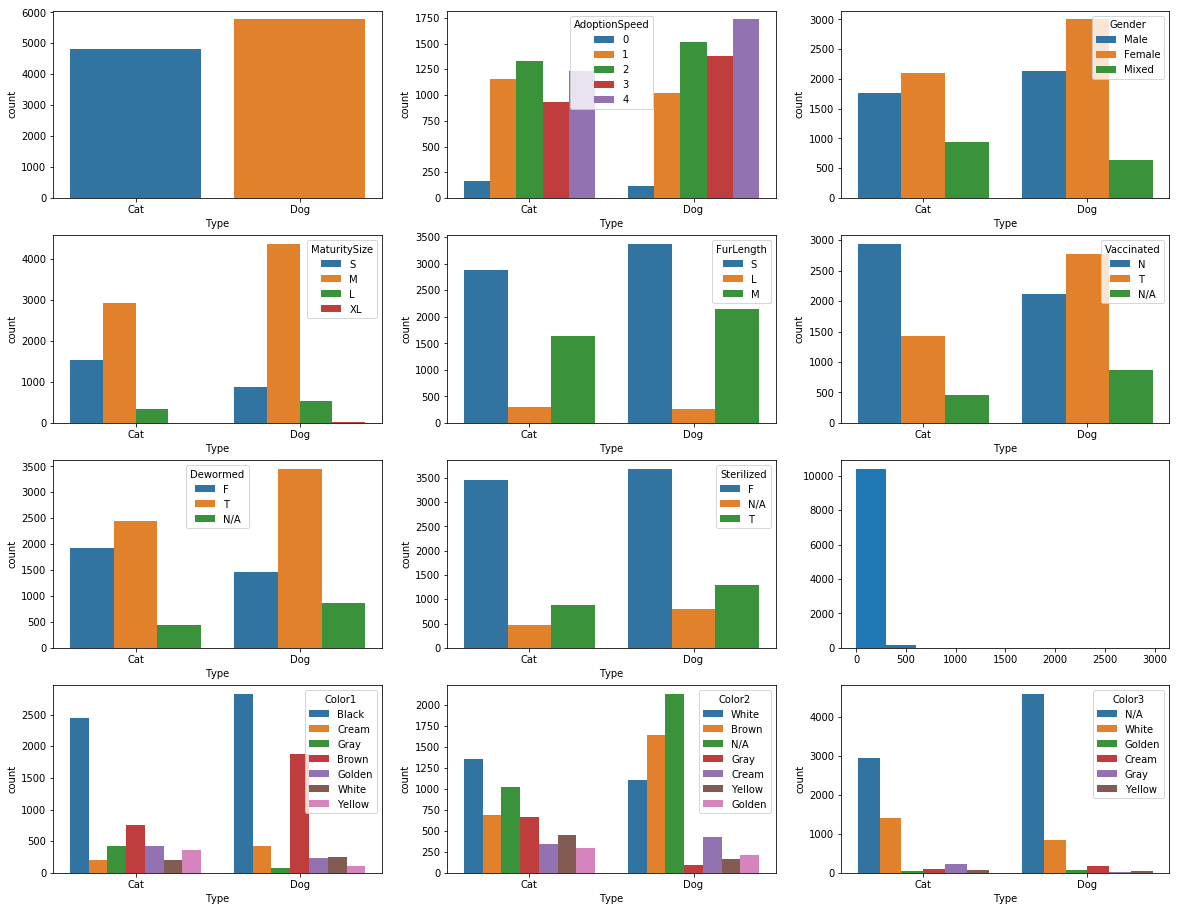

In [92]:
plt.figure(figsize=(20,20))

P=1
f=5
c=3
plt.subplot(f,c,P)
sns.countplot(x="Type", data=train)
P+=1
plt.subplot(f,c,P)
sns.countplot(x="Type", hue="AdoptionSpeed", data=train)
P+=1
plt.subplot(f,c,P)
sns.countplot(x="Type", hue='Gender', data=train)
P+=1
plt.subplot(f,c,P)
sns.countplot(x="Type", hue='MaturitySize', data=train)
P+=1
plt.subplot(f,c,P)
sns.countplot(x="Type", hue='FurLength', data=train)
P+=1
plt.subplot(f,c,P)
sns.countplot(x="Type", hue='Vaccinated', data=train)
P+=1
plt.subplot(f,c,P)
sns.countplot(x="Type", hue='Dewormed', data=train)
P+=1
plt.subplot(f,c,P)
sns.countplot(x="Type", hue='Sterilized', data=train)
P+=1
plt.subplot(f,c,P)
plt.hist(train.Fee)
P+=1
plt.subplot(f,c,P)
sns.countplot(x="Type", hue='Color1', data=train)
P+=1
plt.subplot(f,c,P)
sns.countplot(x="Type", hue='Color2', data=train)
P+=1
plt.subplot(f,c,P)
sns.countplot(x="Type", hue='Color3', data=train)




In [57]:
data = train.groupby(['Type','Breed1']).Gender.count().reset_index().rename(columns={'Gender':'N_breed1'})

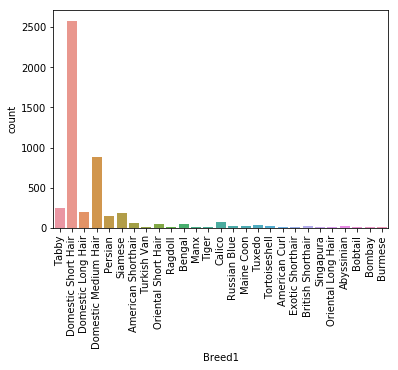

In [91]:
data  = train[train.Type=='Cat'].groupby('Breed1').Gender.count().reset_index().rename(columns={'Gender':'N_breed1'})
datac = data[data.N_breed1>5]

p = sns.countplot(x="Breed1", data=train[(train.Type=='Cat')&(train.Breed1.isin(datac.Breed1.unique()))])
_ = plt.setp(p.get_xticklabels(), rotation=90)

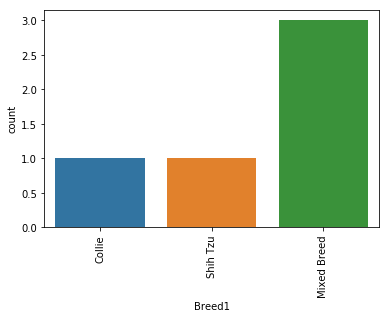

In [90]:
data  = train[train.Type=='Dog'].groupby('Breed1').Gender.count().reset_index().rename(columns={'Gender':'N_breed1'})
datac = data[data.N_breed1>5]

p = sns.countplot(x="Breed1", data=train[(train.Type=='Cat')&(train.Breed1.isin(datac.Breed1.unique()))])
_ = plt.setp(p.get_xticklabels(), rotation=90)

Create a function to transform the datasets. This is done by means of a function so that the transformations are the same for the training and testing datasets... We replace the encodings just to make it easy to "visualize" the data

In [42]:
def transform_data(train_data_fname, test_data_fname):
    df_train = pd.read_csv(train_data_fname)
    df_train = transform_columns(df_train)
    df_test = pd.read_csv(test_data_fname)
    df_test = transform_columns(df_test)
    
    df = pd.concat([df_train, df_test], sort=True)

    # set dummy variables for everything
    # except from Age, Quantity, Fee
    df = pd.get_dummies(df)
    # get train and test back
    n = len(df_train)
    df_train = df.iloc[:n]
    df_test = df.iloc[n:]
    
    y = df_train['AdoptionSpeed']
    X = df_train.drop('AdoptionSpeed', axis=1)
    yy = None
    XX = df_test.drop('AdoptionSpeed', axis=1)

    return X, y, XX, yy

Load the data...

In [43]:
X, y, XX, yy = transform_data("../data/train.csv", "../data/test.csv")

In [44]:
X

,Age,Fee,PID,Quantity,State,Breed1_Abyssinian,Breed1_Affenpinscher,Breed1_Airedale Terrier,Breed1_Akita,Breed1_American Bulldog,...,MaturitySize_S,MaturitySize_XL,Sterilized_F,Sterilized_N/A,Sterilized_T,Type_Cat,Type_Dog,Vaccinated_N,Vaccinated_N/A,Vaccinated_T
0,3,100,0,1,41326,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,0
1,4,150,3,1,41401,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
2,1,0,4,1,41326,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
3,3,0,5,1,41326,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4,12,300,6,1,41326,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
5,2,0,8,1,41326,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
6,2,0,10,1,41401,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
7,2,0,13,7,41326,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
8,3,0,14,1,41401,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
9,78,0,15,1,41326,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


Create the model and evaluate it

In [28]:
# split training dataset into train and "validation" 
# (we won't be using validation set in this example, because of the cross-validation;
# but it couldn be useful for you depending on your approach)
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

results = pd.DataFrame(columns=('clf', 'best_acc'))

from sklearn.tree import DecisionTreeClassifier as DT
tree_param = {'criterion':('gini', 'entropy'), 'min_samples_leaf':(1, 2, 5),
              'min_samples_split':(2, 3, 5, 10, 50, 100)}
tree = DT(random_state=42)
tree_clf = GridSearchCV(tree, tree_param, scoring='accuracy', cv=3, iid=False)
tree_clf.fit(X_train.drop(["PID"], axis=1), y_train)
best_tree_clf = tree_clf.best_estimator_
print('Best Decision Tree accuracy: ', tree_clf.best_score_)
print(best_tree_clf)
results = results.append({'clf': best_tree_clf, 'best_acc': tree_clf.best_score_}, ignore_index=True)

print('The best classifier so far is: ')
print(results.loc[results['best_acc'].idxmax()]['clf'])

Best Decision Tree accuracy:  0.3519622095560508
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
The best classifier so far is: 
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')


**And finally**, we predict the unknown label for the testing set

In [29]:
X.shape, XX.shape

((10582, 360), (4411, 360))

In [30]:
yy = results.clf.iloc[0].predict(XX.drop(["PID"], axis=1))
yy = yy.astype(np.int)

The last thing we do is generating a file that should be *submitted* on kaggle

In [15]:
submission = pd.DataFrame(list(zip(XX.PID, yy)), columns=["PID", "AdoptionSpeed"])

In [15]:
submission.to_csv("../data/submission.csv", header=True, index=False)